<a href="https://colab.research.google.com/github/TristanDelgado/Notebooks/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Every training round is called an "Epoch"

In [1]:
# Loading the MNIST Dataset
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

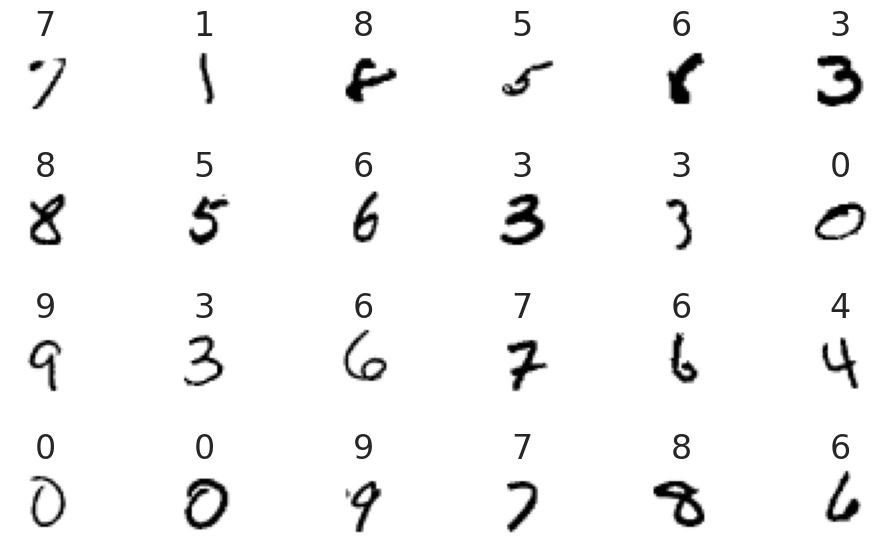

In [4]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 6))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

Neural networks require the shape of the data to be a certain way as the neural network with add many layers to the data as it learns how to interpret the data.

In [5]:
# The following code is getting the data into an acceptable form
X_train = X_train.reshape((60000, 28, 28, 1))
# print(f"X_train: {X_train}")

X_test = X_test.reshape((10000, 28, 28, 1))
# print(f"X_test: {X_test}")

In [6]:
# Next we will use one-hot encoding to categorize each of the numbers into
# a format our neural network will be able to understand
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(f"y_train shape: {y_train.shape}")
print(f"y_train[0]: {y_train[0]}")

y_test = to_categorical(y_test)

y_train shape: (60000, 10)
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Now we create the neural network
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [8]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [9]:
# Convolution Layer which uses the relationships between pixels that are close to
# one another to learn useful features (or patterns) in small areas of each sample.
# These features become inputs to subsequent layers.

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                     input_shape=(28, 28, 1)))


'''
The Conv2D layer is configured with the following arguments:

filters=64—The number of filters in the resulting feature map.

kernel_size=(3, 3)—The size of the kernel used in each filter.

activation='relu'—The 'relu' (Rectified Linear Unit) activation function is used to produce this layer’s output.

'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"\nThe Conv2D layer is configured with the following arguments:\n\nfilters=64—The number of filters in the resulting feature map.\n\nkernel_size=(3, 3)—The size of the kernel used in each filter.\n\nactivation='relu'—The 'relu' (Rectified Linear Unit) activation function is used to produce this layer’s output.\n\n"

In [10]:
# Next we'll add a "pooling layer" which takes a set number of pixles, finds the largest
# feature and keeps only the largest feature

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# Adding another layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
cnn.add(Flatten())

In [13]:
# Adds the "neurons" of a neural network
cnn.add(Dense(units=128, activation='relu'))

In [14]:
# Adding the final layer
# This is the decision layer, it converts the values into classification values
cnn.add(Dense(units=10, activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

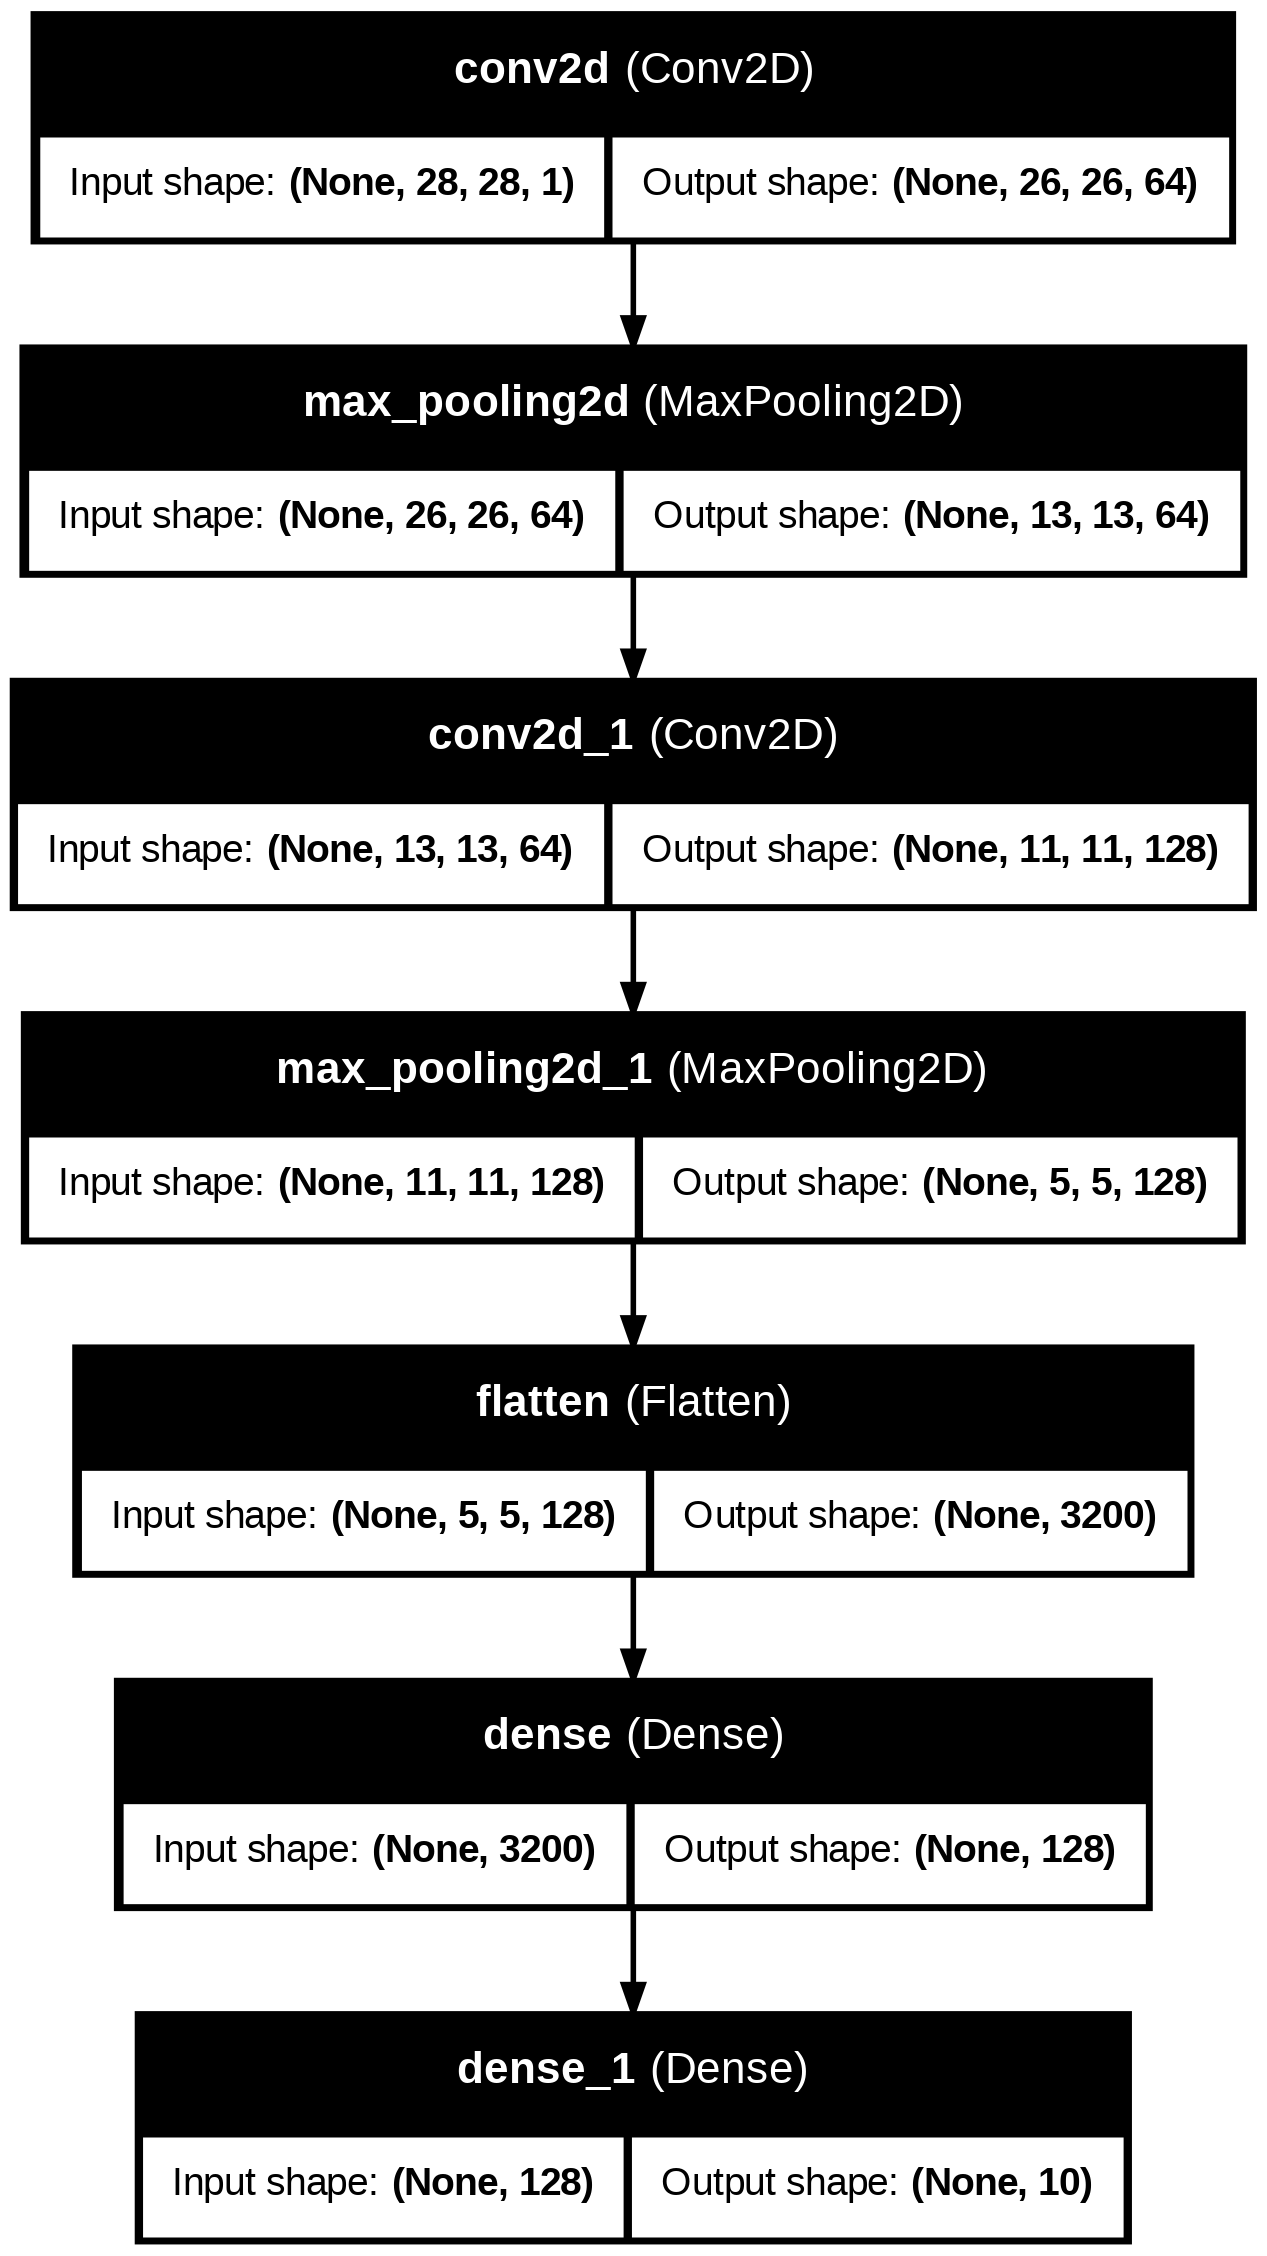

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [18]:
# Finally we must configure the model for training

'''
optimizer='adam'—The optimizer this model will use to adjust the weights throughout
  the neural network as it learns. There are many optimizers59— 'adam' performs
  well across a wide variety of models.

loss='categorical_crossentropy'—This is the loss function used by the optimizer in multi-classification
  networks like our convnet, which will predict 10 classes. As the neural network learns, the
  optimizer attempts to minimize the values returned by the loss function.
  The lower the loss, the better the neural network is at predicting what each image is.
  For binary classification (which we’ll use later in this chapter), Keras
  provides 'binary_crossentropy', and for regression, 'mean_squared_error'.

metrics=['accuracy']—This is a list of the metrics that the network will produce to help
  you evaluate the model. Accuracy is a commonly used metric in classification models.
  In this example, we’ll use the accuracy metric to check the percentage of correct predictions.
'''

cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
# Fitting the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8695 - loss: 2.4586 - val_accuracy: 0.9830 - val_loss: 0.0578
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9837 - loss: 0.0504 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0362 - val_accuracy: 0.9867 - val_loss: 0.0474
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.9878 - val_loss: 0.0436
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9823 - val_loss: 0.0853


In [20]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9701 - loss: 0.1190


In [21]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
print(f"y_test[0]: {y_test[0]} (Representing a 7)\n")
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

y_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] (Representing a 7)

0: 0.0000000000%
1: 0.0000000013%
2: 0.0000005310%
3: 0.0000043556%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000006120%
9: 0.0000000017%


In [27]:
# Finding incorrect predictions

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
      incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

234

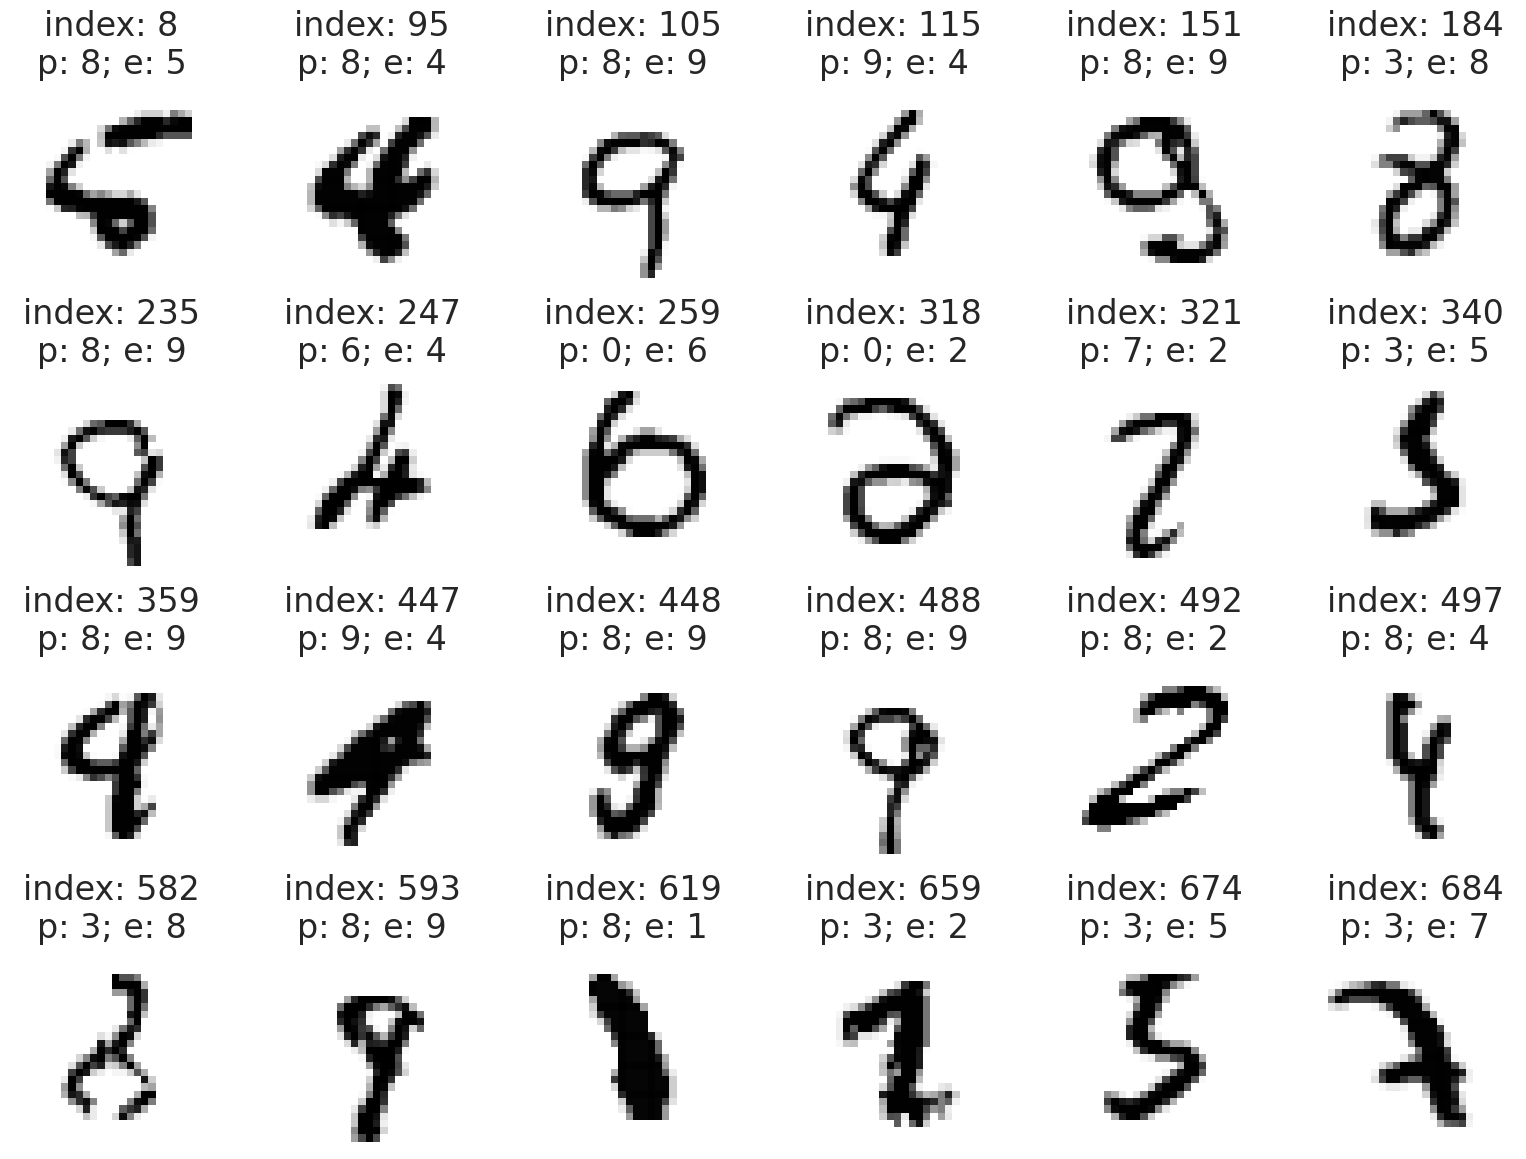

In [28]:
# Visualizing the incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')

plt.tight_layout()

In [33]:
# Function for displaying an incorrect predictions data
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
      print(f'{index}: {probability:.10%}')

In [35]:
display_probabilities(predictions[55])

0: 0.9999995231628418
1: 4.965021958014404e-07
2: 2.849922554892803e-12
3: 2.32972305726567e-13
4: 6.874499342175711e-13
5: 1.0646636905420337e-09
6: 4.208323645116252e-08
7: 2.6284605048054743e-10
8: 4.670738240619698e-10
9: 1.9829341293964298e-11


In [37]:
# Implementing previously trained models
cnn.save('mnist_cnn.keras')

In [38]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
